- https://tianchi.aliyun.com/dataset/175133
- 数据集供包括：6个月的训练集 train.pkl，6个月内发生宕机事件的时间信息pos.pkl，以及3个月的灰度测试集gray.pkl。
```
模型正确性判断
以下 2 种情况为预测正确：
虚拟机发生过内存错误（且导致了节点宕机）。模型根据特征预测该虚拟机未来会导致宕机。
虚拟机发生过内存错误（但不会导致宕机事件）。模型根据特征预测该虚拟机未来不会导致宕机。
以下 2 种情况为预测错误：
虚拟机发生过内存错误（但不会导致宕机事件）。模型根据特征预测该虚拟机未来会导致宕机。
虚拟机发生过内存错误（且导致了节点宕机）。模型根据特征预测该虚拟机未来不会导致宕机。
```

In [3]:
import pandas as pd
import numpy as np

In [33]:

train_dataset = pd.read_pickle('/Users/james/code/hello-world/data/M-MEM/train.pkl')


In [1]:
# 1. BASIC DATASET INFORMATION
print("\n1. DATASET OVERVIEW")
print("-" * 40)
print(f"Total instances: {len(train_dataset):,}")
print(f"Number of columns: {train_dataset.shape[1]}")
print(f"Dataset shape: {train_dataset.shape}")
print(f"\nColumn data types:")
print(train_dataset.dtypes)


1. DATASET OVERVIEW
----------------------------------------


NameError: name 'train_dataset' is not defined

In [35]:
train_dataset.head()

,instance_id,nc_ip,sample_time,c1,c2,c3,c4,c5,c6,c7,...,c296,c297,c298,c299,c300,c301,c302,c303,c304,label
index,,,,,,,,,,,,,,,,,,,,,
251962,id1,ip1,1688321700,15.35,-8.0,0.0,165410,0.96,188206,666,...,0.00,0,1630,0.0,90.0,0,1.64,0.0,200438,1
375846,id1,ip1,1688265600,8.10,-9.0,0.0,150537,0.88,169580,804,...,0.00,0,1514,0.0,43.0,0,0.92,0.0,206276,1
1818345,id1,ip1,1688314800,7.85,-20.0,0.0,164298,0.95,186260,688,...,-8.31,0,1624,0.0,101.0,0,1.27,0.0,201967,1
1324848,id1,ip1,1688296500,7.65,-8.0,0.0,158460,0.92,179310,733,...,0.00,0,1591,0.0,32.0,0,0.69,0.0,203218,1
951165,id1,ip1,1688339400,7.78,1.0,0.0,168885,0.99,193905,636,...,0.00,0,1656,0.0,75.0,0,1.38,0.0,198631,1


<!-- 标签列，标记是否为DCRV	 -->
预测目标是：访问虚拟机时，因为内存原因会导致节点宕机的这一类虚拟机（称为DCRV）。

In [36]:
train_dataset.describe(include='all')

,instance_id,nc_ip,sample_time,c1,c2,c3,c4,c5,c6,c7,...,c296,c297,c298,c299,c300,c301,c302,c303,c304,label
count,3012686,3012686,3.012686e+06,3.012686e+06,3.012686e+06,3.012686e+06,3.012686e+06,3.012686e+06,3.012686e+06,3.012686e+06,...,3.012686e+06,3.012686e+06,3.012686e+06,3.012686e+06,3.012686e+06,3.012686e+06,3.012686e+06,3.012686e+06,3.012686e+06,3.012686e+06
unique,11730,8208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,id924,ip2468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,51359,56996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.694666e+09,1.060613e+02,-2.618773e+01,2.891722e-01,1.930967e+05,6.498482e-01,1.633990e+06,3.804669e+03,...,-1.727121e-01,9.271454e+04,7.609720e+02,1.002168e+00,1.890388e+01,1.696161e-02,5.812821e-01,5.320114e+00,3.647072e+05,3.491841e-01
std,NaN,NaN,4.285474e+06,1.936633e+02,1.217024e+02,8.435815e-01,1.141158e+06,4.510802e-01,7.561685e+06,8.162437e+03,...,3.023818e+00,2.483026e+05,3.831675e+03,3.341982e+00,2.800890e+01,1.291275e-01,5.854405e-01,2.234356e+01,2.377713e+06,4.767123e-01
min,NaN,NaN,1.687651e+09,1.000000e-02,-2.090000e+03,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e+00,...,-8.310000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,1.690991e+09,4.580000e+00,-4.000000e+00,0.000000e+00,0.000000e+00,2.900000e-01,0.000000e+00,2.810000e+02,...,-9.900000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,1.694386e+09,2.074000e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.100000e-01,3.132000e+03,8.710000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00,5.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00
75%,NaN,NaN,1.698139e+09,8.926000e+01,0.000000e+00,0.000000e+00,2.880000e+02,9.100000e-01,3.616200e+05,3.119000e+03,...,5.800000e-01,2.352000e+04,2.100000e+01,0.000000e+00,2.400000e+01,0.000000e+00,8.200000e-01,0.000000e+00,2.968000e+03,1.000000e+00


In [41]:
train_dataset.columns

Index(['instance_id', 'nc_ip', 'sample_time', 'c1', 'c2', 'c3', 'c4', 'c5',
       'c6', 'c7',
       ...
       'c296', 'c297', 'c298', 'c299', 'c300', 'c301', 'c302', 'c303', 'c304',
       'label'],
      dtype='object', length=308)

In [45]:
# 导入必要的库
import pandas as pd
import numpy as np
from PCA_Analysis import run_pca_analysis


In [46]:

# 假设train_dataset已经定义
# 运行PCA分析
analyzer, pca_data = run_pca_analysis(train_dataset, target_column=None)

# 查看降维后的数据
print("原始数据维度:", train_dataset.shape)
print("降维后数据维度:", pca_data.shape)

# 获取最优主成分数量
optimal_components = analyzer.get_optimal_components(0.95)
print(f"推荐使用 {optimal_components} 个主成分")

分析的特征: ['sample_time', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39', 'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49', 'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60', 'c61', 'c62', 'c63', 'c64', 'c65', 'c66', 'c67', 'c68', 'c69', 'c70', 'c71', 'c72', 'c73', 'c74', 'c75', 'c76', 'c77', 'c78', 'c79', 'c80', 'c81', 'c82', 'c83', 'c84', 'c85', 'c86', 'c87', 'c88', 'c89', 'c90', 'c91', 'c92', 'c93', 'c94', 'c95', 'c96', 'c97', 'c98', 'c99', 'c100', 'c101', 'c102', 'c103', 'c104', 'c105', 'c106', 'c107', 'c108', 'c109', 'c110', 'c111', 'c112', 'c113', 'c114', 'c115', 'c116', 'c117', 'c118', 'c119', 'c120', 'c121', 'c122', 'c123', 'c124', 'c125', 'c126', 'c127', 'c128', 'c129', 'c130', 'c131', 'c132', 'c133', 'c134', 'c135', 'c136

In [ ]:
train_dataset_i = train_dataset.select_dtypes(include=[np.number])

In [37]:
train_dataset['label'].value_counts()

label
0    1960704
1    1051982
Name: count, dtype: int64

In [4]:
pos_dataset = pd.read_pickle('/Users/james/code/hello-world/data/M-MEM/pos.pkl')


In [5]:
# 1. BASIC DATASET INFORMATION
print("\n1. DATASET OVERVIEW")
print("-" * 40)
print(f"Total instances: {len(pos_dataset):,}")
print(f"Number of columns: {pos_dataset.shape[1]}")
print(f"Dataset shape: {pos_dataset.shape}")
print(f"\nColumn data types:")
print(pos_dataset.dtypes)


1. DATASET OVERVIEW
----------------------------------------
Total instances: 1,051,982
Number of columns: 4
Dataset shape: (1051982, 4)

Column data types:
instance_id    object
nc_ip          object
time            int64
sample_time     int64
dtype: object


In [6]:
# sample_time = pos_dataset['sample_time'].value_counts()
# sample_time

# 采样时间	
pos_dataset["sapmle_date_time"] = pd.to_datetime(pos_dataset["sample_time"],unit='s')
# 宕机时间	
pos_dataset["down_time"] = pd.to_datetime(pos_dataset["time"],unit='s')


In [7]:

pos_dataset.head()

,instance_id,nc_ip,time,sample_time,sapmle_date_time,down_time
0,id2,ip2,1697377654,1689547500,2023-07-16 22:45:00,2023-10-15 13:47:34
1,id2,ip2,1697377654,1691739900,2023-08-11 07:45:00,2023-10-15 13:47:34
2,id2,ip2,1697377654,1691762700,2023-08-11 14:05:00,2023-10-15 13:47:34
3,id2,ip2,1697377654,1691797500,2023-08-11 23:45:00,2023-10-15 13:47:34
4,id2,ip2,1697377654,1691731200,2023-08-11 05:20:00,2023-10-15 13:47:34


In [8]:
cols = ['instance_id','down_time']
pos_dataset_1 = pos_dataset[cols]
pos_dataset_1

,instance_id,down_time
0,id2,2023-10-15 13:47:34
1,id2,2023-10-15 13:47:34
2,id2,2023-10-15 13:47:34
3,id2,2023-10-15 13:47:34
4,id2,2023-10-15 13:47:34
...,...,...
1051977,id798,2023-12-01 10:04:27
1051978,id798,2023-12-01 10:04:27
1051979,id798,2023-12-01 10:04:27
1051980,id798,2023-12-01 10:04:27


In [9]:
unique_down_times = pos_dataset_1['down_time'].drop_duplicates()
unique_down_times

0         2023-10-15 13:47:34
30712     2023-10-05 14:59:22
60095     2023-08-29 22:53:13
60715     2023-11-16 14:00:00
60716     2023-11-21 13:25:35
                  ...        
986540    2023-07-17 18:13:44
986547    2023-11-27 10:41:07
1006220   2023-10-30 20:56:00
1006221   2023-10-21 21:50:05
1006236   2023-12-01 10:04:27
Name: down_time, Length: 800, dtype: datetime64[ns]

In [10]:
pos_dataset_unique = pos_dataset_1.drop_duplicates(subset=['down_time', 'instance_id'])
pos_dataset_unique

,instance_id,down_time
0,id2,2023-10-15 13:47:34
30712,id387,2023-10-05 14:59:22
60095,id537,2023-08-29 22:53:13
60715,id246,2023-11-16 14:00:00
60716,id185,2023-11-21 13:25:35
...,...,...
986540,id615,2023-07-17 18:13:44
986547,id20,2023-11-27 10:41:07
1006220,id143,2023-10-30 20:56:00
1006221,id481,2023-10-21 21:50:05


In [11]:

gray_dataset = pd.read_pickle('/Users/james/code/hello-world/data/M-MEM/gray.pkl')

In [14]:
# 1. BASIC DATASET INFORMATION
print("\n1. DATASET OVERVIEW")
print("-" * 40)
print(f"Total instances: {len(gray_dataset):,}")
print(f"Number of columns: {gray_dataset.shape[1]}")
print(f"Dataset shape: {gray_dataset.shape}")
print(f"\nColumn data types:")
print(gray_dataset.dtypes)


1. DATASET OVERVIEW
----------------------------------------
Total instances: 1,230,502
Number of columns: 307
Dataset shape: (1230502, 307)

Column data types:
instance_id     object
nc_ip           object
c1             float64
c2             float64
c3             float64
                ...   
c301             int64
c302           float64
c303           float64
c304             int64
label            int64
Length: 307, dtype: object


In [31]:
#取gray_dataset的第2到倒数第2列
feature_gray_dataset = gray_dataset[gray_dataset.columns[2:-1]]
feature_gray_dataset.head()


,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c295,c296,c297,c298,c299,c300,c301,c302,c303,c304
index,,,,,,,,,,,,,,,,,,,,,
909823,0.57,-23.0,0.0,0,0.01,297,58,297,315,33,...,-5.0,8.31,288,4,0.0,18.0,0,0.17,0.0,63
33925,0.79,-11.0,0.0,0,0.01,387,78,387,459,43,...,-9.0,8.31,288,5,0.0,2.0,0,0.17,0.0,72
368275,1.99,-14.0,0.0,0,0.01,720,176,720,1107,80,...,-10.0,8.31,288,21,0.0,4.0,0,0.17,0.0,261
521230,1.04,-13.0,0.0,0,0.01,486,103,486,630,54,...,-9.0,8.31,288,7,0.0,4.0,0,0.17,0.0,108
1118658,0.06,-4.0,0.0,0,0.01,189,37,189,171,21,...,0.0,8.31,0,2,0.0,4.0,0,0.00,0.0,36


In [32]:
#显示feature_gray_dataset的各列的数据类型、范围、数据个数
feature_gray_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1230502 entries, 909823 to 894351
Columns: 304 entries, c1 to c304
dtypes: float64(145), int64(159)
memory usage: 2.8 GB


In [33]:
#显示feature_gray_dataset的各列的数据类型、范围、数据个数
feature_gray_dataset.describe()


,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c295,c296,c297,c298,c299,c300,c301,c302,c303,c304
count,1.230502e+06,1.230502e+06,1.230502e+06,1.230502e+06,1.230502e+06,1.230502e+06,1.230502e+06,1.230502e+06,1.230502e+06,1.230502e+06,...,1.230502e+06,1.230502e+06,1.230502e+06,1.230502e+06,1.230502e+06,1.230502e+06,1.230502e+06,1.230502e+06,1.230502e+06,1.230502e+06
mean,7.124308e+01,-1.510571e+01,3.120305e-01,2.639258e+05,5.858048e-01,1.892373e+06,3.127787e+03,9.920788e+05,8.799766e+05,3.095768e+03,...,-1.722773e+01,9.517879e-02,8.811663e+04,1.040341e+03,9.950110e-01,1.588510e+01,6.455902e-02,5.455421e-01,5.217297e+00,1.691007e+05
std,1.565970e+02,6.185983e+01,9.077627e-01,1.488561e+06,4.071363e-01,7.600364e+06,8.011203e+03,4.082480e+06,2.800581e+06,1.346711e+04,...,6.083370e+01,3.079859e+00,2.352800e+05,6.141954e+03,3.406559e+00,2.037256e+01,2.457462e-01,5.224531e-01,2.277401e+01,1.080184e+06
min,1.000000e-02,-1.332000e+03,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.207000e+03,-8.310000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.850000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,2.200000e-01,0.000000e+00,1.840000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.200000e+01,-7.700000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.464000e+01,0.000000e+00,0.000000e+00,0.000000e+00,6.200000e-01,2.260000e+02,6.700000e+02,7.000000e+01,3.322800e+04,1.000000e+00,...,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00,5.100000e-01,0.000000e+00,0.000000e+00
75%,4.882000e+01,0.000000e+00,0.000000e+00,0.000000e+00,8.900000e-01,1.028430e+05,1.737000e+03,6.452325e+04,3.827340e+05,2.910000e+02,...,0.000000e+00,9.200000e-01,6.920800e+04,9.000000e+00,0.000000e+00,2.300000e+01,0.000000e+00,7.200000e-01,0.000000e+00,1.323000e+03
max,1.111060e+03,4.160000e+02,4.990000e+00,2.532258e+07,4.060000e+00,8.403408e+07,1.000880e+05,6.569712e+07,3.202358e+07,2.291220e+05,...,4.030000e+02,8.310000e+00,2.423808e+06,9.879100e+04,2.204000e+01,6.530000e+02,1.000000e+00,3.060000e+00,1.660100e+02,2.472451e+07


In [37]:
#显示feature_gray_dataset的各列的数据类型、最大值、最小值、数据个数，0值个数
# zero_counts = (feature_gray_dataset == 0).sum()

#获取feature_gray_dataset中类型为int的列
int_columns = feature_gray_dataset.select_dtypes(include=['int'])
int_columns.head()


,c4,c6,c7,c8,c9,c10,c12,c13,c16,c17,...,c281,c282,c286,c287,c291,c294,c297,c298,c301,c304
index,,,,,,,,,,,,,,,,,,,,,
909823,0,297,58,297,315,33,2,18,7,58,...,24,315,81,288,1,288,288,4,0,63
33925,0,387,78,387,459,43,2,18,7,78,...,29,459,117,288,1,288,288,5,0,72
368275,0,720,176,720,1107,80,2,18,8,176,...,45,1107,234,288,1,288,288,21,0,261
521230,0,486,103,486,630,54,2,18,8,103,...,32,630,144,288,1,288,288,7,0,108
1118658,0,189,37,189,171,21,2,18,7,37,...,22,171,45,0,1,0,0,2,0,36


In [52]:
def calculate_stats(dateframe_a : pd.DataFrame) -> pd.DataFrame:
    """
    计算整数列的统计信息
    
    返回:
    包含最大值、最小值和0值个数的DataFrame
    """
    if dateframe_a is None:
        return pd.DataFrame()
        
    # if not int_columns:
    #     return pd.DataFrame()
    
    stats_data = []
    df = dateframe_a
    for col in df:
        # 计算统计信息
        max_val = df[col].max()
        min_val = df[col].min()
        zero_count = (df[col] == 0).sum()
        total_count = len(df[col])
        zero_percentage = (zero_count / total_count) * 100
        
        # 计算其他有用信息
        non_zero_count = total_count - zero_count
        unique_count = df[col].nunique()
        
        stats_data.append({
            '列名': col,
            '最大值': max_val,
            '最小值': min_val,
            '0值个数': zero_count,
            '0值占比(%)': round(zero_percentage, 2),
            '非0值个数': non_zero_count,
            '总记录数': total_count,
            '唯一值个数': unique_count
        })
    
    stats_df = pd.DataFrame(stats_data)
    return stats_df

In [49]:
int_columns_stats = calculate_stats(int_columns)
int_columns_stats

,列名,最大值,最小值,0值个数,0值占比(%),非0值个数,总记录数,唯一值个数
0,c4,25322584,0,990993,80.54,239509,1230502,52703
1,c6,84034080,0,579928,47.13,650574,1230502,142541
2,c7,100088,1,0,0.00,1230502,1230502,46289
3,c8,65697120,0,605925,49.24,624577,1230502,125639
4,c9,32023584,0,421268,34.24,809234,1230502,242950
...,...,...,...,...,...,...,...,...
154,c294,3691008,0,866056,70.38,364446,1230502,3395
155,c297,2423808,0,883810,71.83,346692,1230502,4204
156,c298,98791,0,805141,65.43,425361,1230502,25703
157,c301,1,0,1151062,93.54,79440,1230502,2


In [53]:
float_columns_stats = calculate_stats(float_columns)
float_columns_stats


,列名,最大值,最小值,0值个数,0值占比(%),非0值个数,总记录数,唯一值个数
0,c1,1111.06,0.01,0,0.00,1230502,1230502,61337
1,c2,416.00,-1332.00,828403,67.32,402099,1230502,1210
2,c3,4.99,0.00,1041325,84.63,189177,1230502,493
3,c5,4.06,0.01,0,0.00,1230502,1230502,362
4,c11,99.00,-156.00,485391,39.45,745111,1230502,203
...,...,...,...,...,...,...,...,...
140,c296,8.31,-8.31,325199,26.43,905303,1230502,853
141,c299,22.04,0.00,1047882,85.16,182620,1230502,2104
142,c300,653.00,0.00,252063,20.48,978439,1230502,358
143,c302,3.06,0.00,332989,27.06,897513,1230502,231


In [59]:
from typing import List, Dict, Union

def get_detailed_stats(dataframe_a : pd.DataFrame) -> Dict[str, Dict]:
    """
    获取详细的统计信息
    
    返回:
    字典，键为列名，值为该列的详细统计信息
    """
    if int_columns is None:
        return {}
        
    detailed_stats = {}
    df = dataframe_a.copy()
    for col in df:
        print(f"Processing column: {col}")
        col_data = df[col].dropna()
        
        stats = {
            '最大值': int(col_data.max()),
            '最小值': int(col_data.min()),
            '0值个数': int((col_data == 0).sum()),
            '正数个数': int((col_data > 0).sum()),
            '负数个数': int((col_data < 0).sum()),
            '唯一值': col_data.nunique(),
            '均值': float(col_data.mean()),
            '中位数': float(col_data.median()),
            '标准差': float(col_data.std()),
            '缺失值个数': int(df[col].isna().sum()),
            '数据类型': str(df[col].dtype)
        }
        
        detailed_stats[col] = stats
        
    return detailed_stats

In [61]:
gray_dataset_stats = get_detailed_stats(int_columns)
gray_dataset_stats

Processing column: c4
Processing column: c6
Processing column: c7
Processing column: c8
Processing column: c9
Processing column: c10
Processing column: c12
Processing column: c13
Processing column: c16
Processing column: c17
Processing column: c20
Processing column: c21
Processing column: c24
Processing column: c28
Processing column: c29
Processing column: c31
Processing column: c33
Processing column: c35
Processing column: c36
Processing column: c40
Processing column: c41
Processing column: c44
Processing column: c45
Processing column: c48
Processing column: c50
Processing column: c53
Processing column: c54
Processing column: c55
Processing column: c58
Processing column: c59
Processing column: c61
Processing column: c65
Processing column: c68
Processing column: c70
Processing column: c71
Processing column: c72
Processing column: c73
Processing column: c74
Processing column: c75
Processing column: c76
Processing column: c77
Processing column: c79
Processing column: c81
Processing colum

{'c4': {'最大值': 25322584,
  '最小值': 0,
  '0值个数': 990993,
  '正数个数': 239509,
  '负数个数': 0,
  '唯一值': 52703,
  '均值': 263925.8445886313,
  '中位数': 0.0,
  '标准差': 1488561.413844228,
  '缺失值个数': 0,
  '数据类型': 'int64'},
 'c6': {'最大值': 84034080,
  '最小值': 0,
  '0值个数': 579928,
  '正数个数': 650574,
  '负数个数': 0,
  '唯一值': 142541,
  '均值': 1892372.7429723805,
  '中位数': 226.0,
  '标准差': 7600363.720567006,
  '缺失值个数': 0,
  '数据类型': 'int64'},
 'c7': {'最大值': 100088,
  '最小值': 1,
  '0值个数': 0,
  '正数个数': 1230502,
  '负数个数': 0,
  '唯一值': 46289,
  '均值': 3127.786894291923,
  '中位数': 670.0,
  '标准差': 8011.203336472882,
  '缺失值个数': 0,
  '数据类型': 'int64'},
 'c8': {'最大值': 65697120,
  '最小值': 0,
  '0值个数': 605925,
  '正数个数': 624577,
  '负数个数': 0,
  '唯一值': 125639,
  '均值': 992078.8396369937,
  '中位数': 70.0,
  '标准差': 4082480.4801734164,
  '缺失值个数': 0,
  '数据类型': 'int64'},
 'c9': {'最大值': 32023584,
  '最小值': 0,
  '0值个数': 421268,
  '正数个数': 809234,
  '负数个数': 0,
  '唯一值': 242950,
  '均值': 879976.6227482767,
  '中位数': 33228.0,
  '标准差': 2800580.8680081666,


In [62]:
float_columns_stats = get_detailed_stats(float_columns)
float_columns_stats

Processing column: c1
Processing column: c2
Processing column: c3
Processing column: c5
Processing column: c11
Processing column: c14
Processing column: c15
Processing column: c18
Processing column: c19
Processing column: c22
Processing column: c23
Processing column: c25
Processing column: c26
Processing column: c27
Processing column: c30
Processing column: c32
Processing column: c34
Processing column: c37
Processing column: c38
Processing column: c39
Processing column: c42
Processing column: c43
Processing column: c46
Processing column: c47
Processing column: c49
Processing column: c51
Processing column: c52
Processing column: c56
Processing column: c57
Processing column: c60
Processing column: c62
Processing column: c63
Processing column: c64
Processing column: c66
Processing column: c67
Processing column: c69
Processing column: c78
Processing column: c80
Processing column: c83
Processing column: c86
Processing column: c95
Processing column: c96
Processing column: c98
Processing colu

{'c1': {'最大值': 1111,
  '最小值': 0,
  '0值个数': 0,
  '正数个数': 1230502,
  '负数个数': 0,
  '唯一值': 61337,
  '均值': 71.24307706935869,
  '中位数': 14.64,
  '标准差': 156.5969939821089,
  '缺失值个数': 0,
  '数据类型': 'float64'},
 'c2': {'最大值': 416,
  '最小值': -1332,
  '0值个数': 828403,
  '正数个数': 83133,
  '负数个数': 318966,
  '唯一值': 1210,
  '均值': -15.105705638836833,
  '中位数': 0.0,
  '标准差': 61.859825281481875,
  '缺失值个数': 0,
  '数据类型': 'float64'},
 'c3': {'最大值': 4,
  '最小值': 0,
  '0值个数': 1041325,
  '正数个数': 189177,
  '负数个数': 0,
  '唯一值': 493,
  '均值': 0.3120305046233164,
  '中位数': 0.0,
  '标准差': 0.9077627051438776,
  '缺失值个数': 0,
  '数据类型': 'float64'},
 'c5': {'最大值': 4,
  '最小值': 0,
  '0值个数': 0,
  '正数个数': 1230502,
  '负数个数': 0,
  '唯一值': 362,
  '均值': 0.5858047609837288,
  '中位数': 0.62,
  '标准差': 0.40713629815133584,
  '缺失值个数': 0,
  '数据类型': 'float64'},
 'c11': {'最大值': 99,
  '最小值': -156,
  '0值个数': 485391,
  '正数个数': 305289,
  '负数个数': 439822,
  '唯一值': 203,
  '均值': -0.751318567543978,
  '中位数': 0.0,
  '标准差': 5.172134806006775,
  '缺失值个数': 0,
 

In [65]:
from PCA_Analysis import MemoryPCAnalyzer
# 创建分析器
analyzer = MemoryPCAnalyzer(int_columns)


In [66]:
# 准备数据
features = analyzer.prepare_data()
print(f"分析的特征: {features}")

分析的特征: ['c4', 'c6', 'c7', 'c8', 'c9', 'c10', 'c12', 'c13', 'c16', 'c17', 'c20', 'c21', 'c24', 'c28', 'c29', 'c31', 'c33', 'c35', 'c36', 'c40', 'c41', 'c44', 'c45', 'c48', 'c50', 'c53', 'c54', 'c55', 'c58', 'c59', 'c61', 'c65', 'c68', 'c70', 'c71', 'c72', 'c73', 'c74', 'c75', 'c76', 'c77', 'c79', 'c81', 'c82', 'c84', 'c85', 'c87', 'c88', 'c89', 'c90', 'c91', 'c92', 'c93', 'c94', 'c97', 'c99', 'c101', 'c103', 'c108', 'c112', 'c114', 'c115', 'c116', 'c118', 'c120', 'c121', 'c124', 'c126', 'c128', 'c129', 'c130', 'c131', 'c132', 'c137', 'c140', 'c141', 'c144', 'c150', 'c152', 'c154', 'c156', 'c158', 'c159', 'c161', 'c162', 'c165', 'c166', 'c167', 'c169', 'c170', 'c174', 'c175', 'c176', 'c177', 'c178', 'c179', 'c180', 'c181', 'c182', 'c183', 'c184', 'c186', 'c187', 'c190', 'c192', 'c194', 'c195', 'c197', 'c199', 'c200', 'c201', 'c202', 'c203', 'c204', 'c207', 'c211', 'c214', 'c216', 'c218', 'c226', 'c227', 'c228', 'c229', 'c233', 'c235', 'c236', 'c237', 'c241', 'c242', 'c244', 'c245', 'c247

In [67]:
# 标准化数据
analyzer.scale_data()


数据已标准化，特征数量: 159


array([[-0.1773027 , -0.24894552, -0.3831869 , ..., -0.1687315 ,
        -0.26270616, -0.15648982],
       [-0.1773027 , -0.24893368, -0.38069039, ..., -0.16856869,
        -0.26270616, -0.15648148],
       [-0.1773027 , -0.24888987, -0.36845752, ..., -0.16596365,
        -0.26270616, -0.15630651],
       ...,
       [-0.1773027 , -0.2489846 , -0.38793026, ..., -0.16938276,
        -0.26270616, -0.15654814],
       [-0.1773027 , -0.2489846 , -0.38555858, ..., -0.16938276,
        -0.26270616, -0.15654814],
       [-0.1773027 , -0.2489846 , -0.39017711, ..., -0.16938276,
        -0.26270616, -0.15654814]])

In [73]:

# 执行PCA
analyzer.fit_pca(n_components=10)


PCA(n_components=10)

In [71]:
import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False


In [79]:
print(analyzer.explained_variance_ratio)
print(analyzer.cumulative_variance)
print(analyzer.pca.components_)

[0.30440293 0.102752   0.07562005 0.05939366 0.05330964 0.03877266
 0.03801735 0.03113748 0.02109902 0.01944077]
[0.30440293 0.40715492 0.48277498 0.54216864 0.59547828 0.63425094
 0.67226828 0.70340576 0.72450478 0.74394554]
[[ 0.05003539  0.09418269  0.10178258 ...  0.03439458  0.01006555
   0.03435312]
 [-0.0023175  -0.09423293 -0.13447457 ... -0.05669043 -0.01993035
  -0.05139826]
 [-0.1662379  -0.07806239  0.04835805 ... -0.14739433  0.00201522
  -0.1403237 ]
 ...
 [ 0.06084217 -0.07915633  0.02850481 ...  0.24486838 -0.00863532
   0.25265967]
 [-0.06665211  0.02508173 -0.00334499 ...  0.02415558  0.07368719
   0.02679236]
 [ 0.16046979 -0.01398287 -0.00266347 ... -0.08498262 -0.00077567
  -0.10272191]]


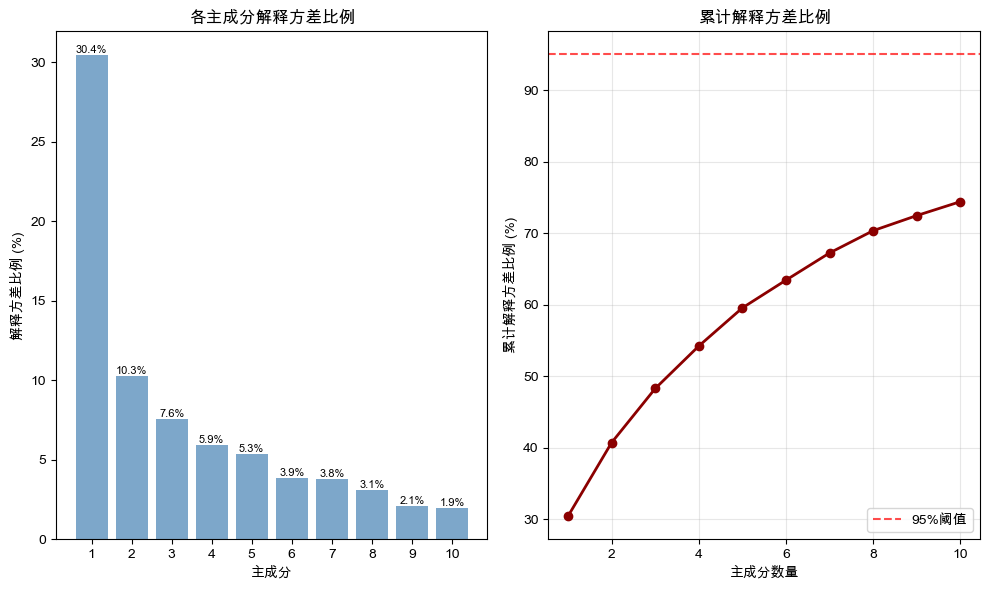

In [74]:

# 绘制解释方差图
analyzer.plot_explained_variance()


In [ ]:

# 获取最优主成分数量
optimal_n = analyzer.get_optimal_components(0.95)


In [83]:

# 2D投影
# analyzer.plot_2d_projection(target_column=['c4','c6'])


In [84]:

# 特征贡献度分析
analyzer.get_feature_contributions()


对PC1贡献最大的10个特征:
c187    0.126612
c84     0.126101
c45     0.125983
c186    0.125782
c226    0.125563
c68     0.122473
c167    0.120874
c150    0.119834
c156    0.119444
c70     0.118923
Name: PC1, dtype: float64

对PC2贡献最大的10个特征:
c92     0.143353
c197    0.139745
c228    0.139576
c71     0.139575
c24     0.137599
c17     0.136220
c7      0.134475
c237    0.133683
c199    0.132333
c259    0.130945
Name: PC2, dtype: float64


,PC1,PC2
c4,0.050035,-0.002317
c6,0.094183,-0.094233
c7,0.101783,-0.134475
c8,0.087205,-0.097076
c9,0.108532,-0.094089
...,...,...
c294,0.103561,0.080379
c297,0.101288,0.089718
c298,0.034395,-0.056690
c301,0.010066,-0.019930


对PC1贡献最大的15个特征:
c187    0.126612
c84     0.126101
c45     0.125983
c186    0.125782
c226    0.125563
c68     0.122473
c167    0.120874
c150    0.119834
c156    0.119444
c70     0.118923
c176    0.116046
c233    0.115891
c263    0.115868
c236    0.115846
c131    0.115567
Name: PC1, dtype: float64

对PC2贡献最大的15个特征:
c92     0.143353
c197    0.139745
c228    0.139576
c71     0.139575
c24     0.137599
c17     0.136220
c7      0.134475
c237    0.133683
c199    0.132333
c259    0.130945
c87     0.130864
c28     0.130864
c140    0.130251
c247    0.130251
c251    0.129876
Name: PC2, dtype: float64


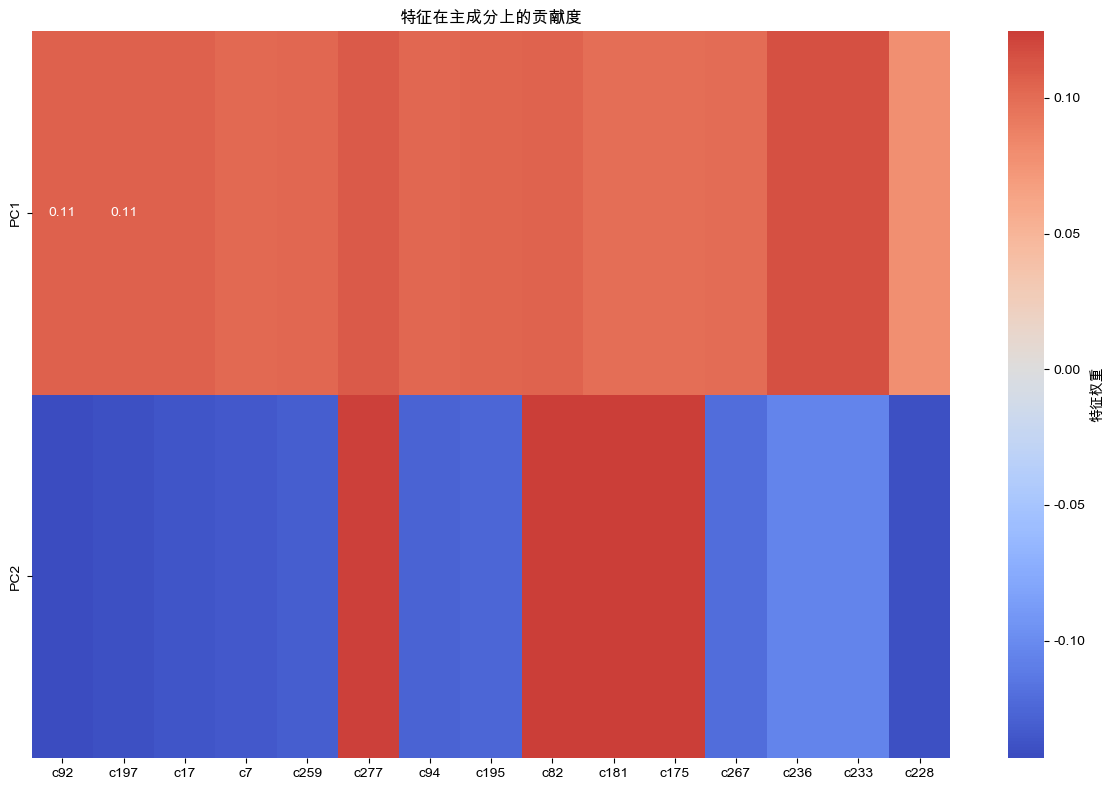

In [85]:

analyzer.plot_feature_contributions()


In [ ]:

# 转换数据
if optimal_n:
    transformed_data = analyzer.transform_data(optimal_n)
else:
    transformed_data = analyzer.transform_data(2)


In [ ]:
# 假设train_dataset已经加载
# analyzer, pca_data = run_pca_analysis(train_dataset, target_column='your_target_column')
analyzer, pca_data = run_pca_analysis(int_columns)
    

In [20]:
# 2. INSTANCE ROLE DISTRIBUTION
print("\n2. INSTANCE ROLE DISTRIBUTION")
print("-" * 40)
label = gray_dataset['label'].value_counts()
print(f"Total instances: {len(label):,}")

ip_dist =gray_dataset['nc_ip'].value_counts()
print(f"Total instances: {len(ip_dist):,}")

role_dist = gray_dataset[2:-1].value_counts()
print(f"Total instances: {len(role_dist):,}")
# print(f"CN (CPU Node) instances: {role_dist.get('CN', 0):,} ({role_dist.get('CN', 0)/len(df)*100:.1f}%)")
# print(f"HN (Heterogeneous GPU Node) instances: {role_dist.get('HN', 0):,} ({role_dist.get('HN', 0)/len(df)*100:.1f}%)")


2. INSTANCE ROLE DISTRIBUTION
----------------------------------------
Total instances: 2
Total instances: 4,887


KeyError: 'role'

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False


/var/folders/5q/wdcm6zlj25xb532rzm7qm1f40000gn/T/ipykernel_57812/1000868616.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


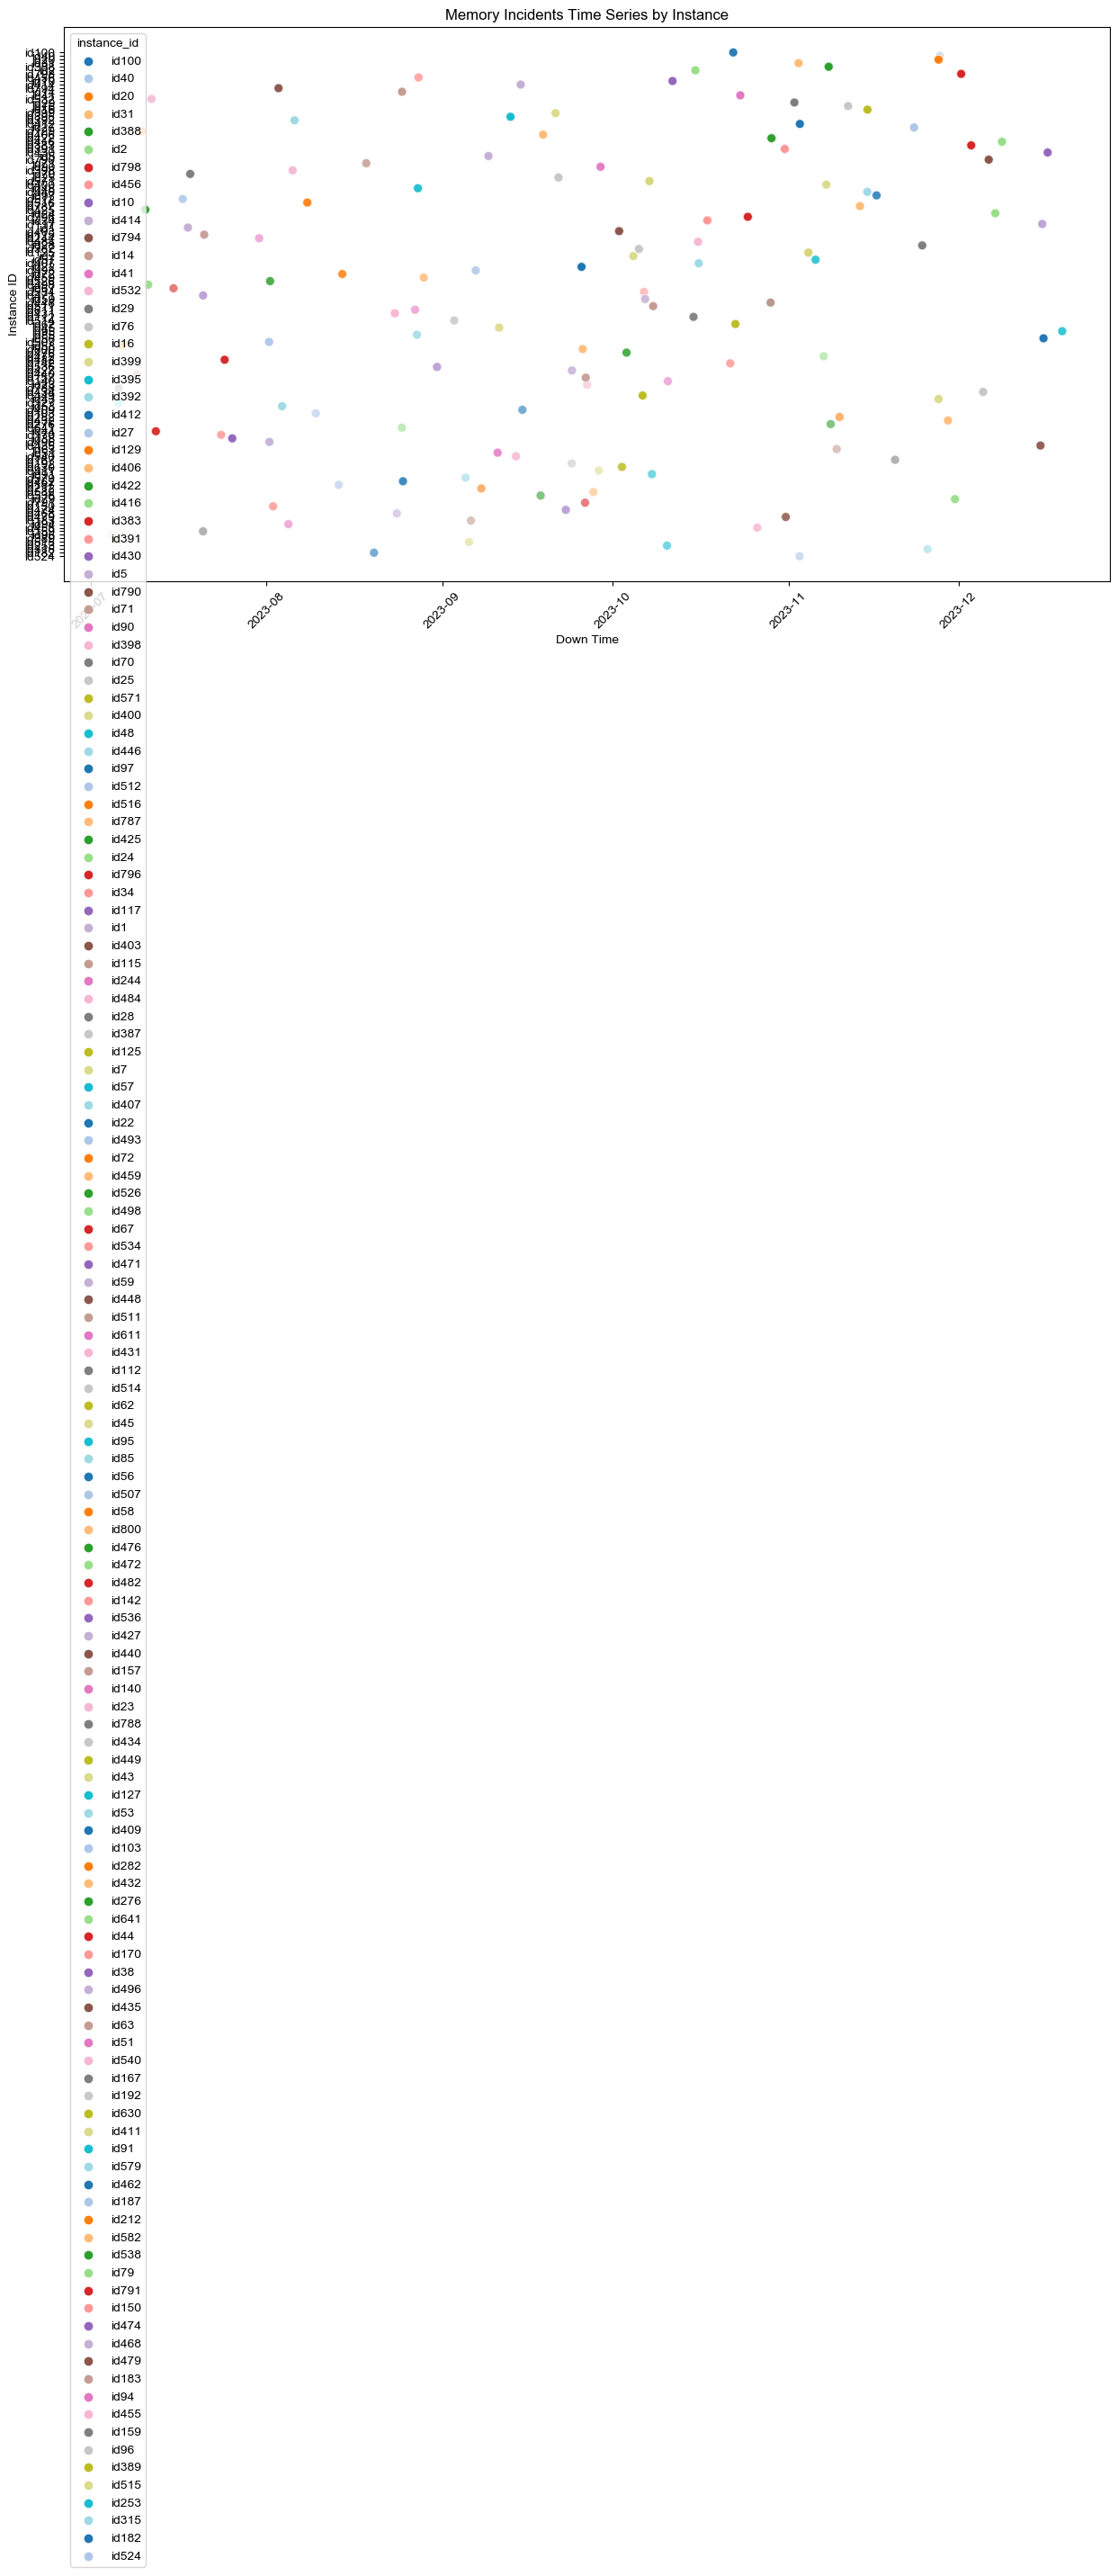

In [30]:
# 3. 创建可视化
plt.figure(figsize=(15, 8))

# 采样数据（如果数据量很大）
sample_data = pos_dataset.sample(min(1000, len(pos_dataset_unique)), random_state=42)

# 4. 绘制散点图
sns.scatterplot(
    data=sample_data,
    x='down_time',
    y='instance_id',
    hue='instance_id',
    palette='tab20',
    alpha=0.6,
    s=50
)

plt.xticks(rotation=45)
plt.xlabel('Down Time')
plt.ylabel('Instance ID')
plt.title('Memory Incidents Time Series by Instance')
plt.tight_layout()
plt.show()

/var/folders/5q/wdcm6zlj25xb532rzm7qm1f40000gn/T/ipykernel_57812/1793426723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_dataset_unique['hour'] = pos_dataset_unique['down_time'].dt.hour
/var/folders/5q/wdcm6zlj25xb532rzm7qm1f40000gn/T/ipykernel_57812/1793426723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_dataset_unique['date'] = pos_dataset_unique['down_time'].dt.date


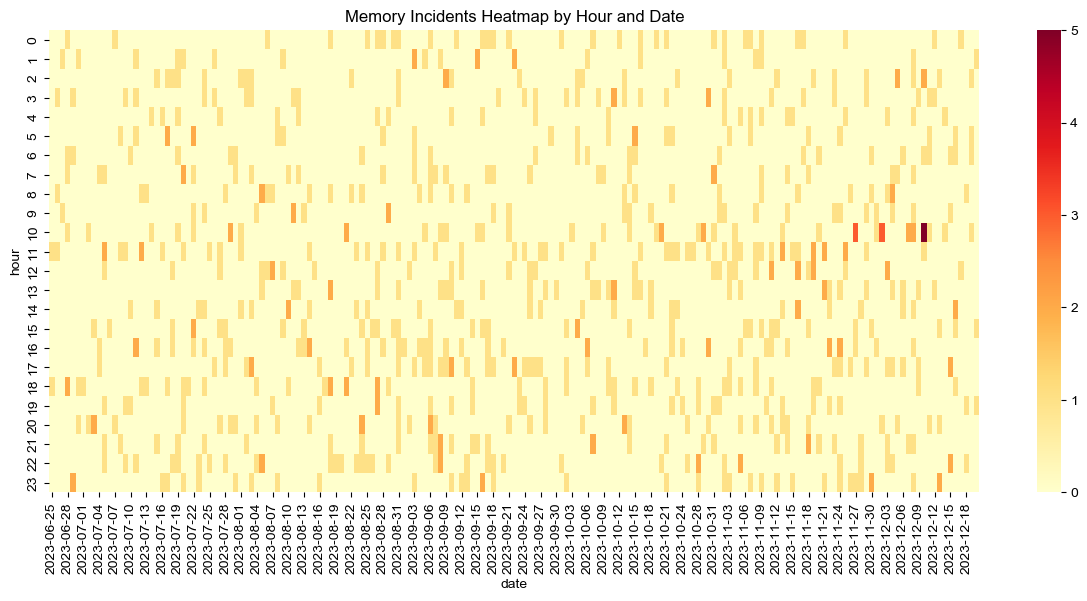

In [32]:
# 按时间段聚合显示
pos_dataset_unique['hour'] = pos_dataset_unique['down_time'].dt.hour
pos_dataset_unique['date'] = pos_dataset_unique['down_time'].dt.date

# 创建热力图
pivot_table = pos_dataset_unique.pivot_table(
    index='hour',
    columns='date',
    values='instance_id',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table, cmap='YlOrRd')
plt.title('Memory Incidents Heatmap by Hour and Date')
plt.show()